# Vector Spaces

In [38]:
# Define two 2D vectors using NumPy
import numpy as np

# Define the first vector
vector1 = np.array([1, 4])
# Define the second vector
vector2 = np.array([5, 4])

In [39]:
# Computes the angle between the two vectors
def angle_between_vectors(v1, v2):
    """Calculate the angle in radians between two vectors."""
    prod = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    cos_angle = prod / (norm_v1 * norm_v2)
    return np.arccos(cos_angle)

# Calculate the angle between the two vectors
print("The angle between", vector1, "and", vector2, "is:", np.degrees(angle_between_vectors(vector1, vector2)), "degrees")

The angle between [1 4] and [5 4] is: 37.30394827798342 degrees


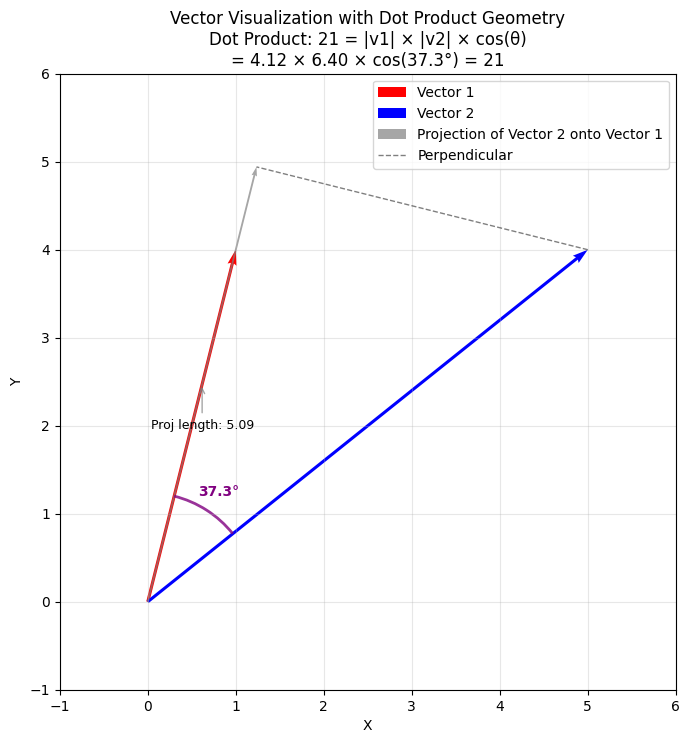

In [40]:
import matplotlib.pyplot as plt

# Create a function to plot vectorsdef
def plot_vectors_with_projection(*vectors, labels=None, colors=None, dot_product=None, angle=None, show_projection=True):
    """Plot multiple vectors with dot product projection visualization."""
    fig, ax = plt.subplots(figsize=(10, 8))

    if colors is None:
        colors = ['red', 'blue', 'green', 'orange', 'purple']

    for i, vector in enumerate(vectors):
        color = colors[i % len(colors)]
        label = labels[i] if labels else f'Vector {i+1}'

        # Plot vector as arrow from origin
        ax.quiver(0, 0, vector[0], vector[1],
                 angles='xy', scale_units='xy', scale=1,
                 color=color, label=label, width=0.005)

    # Show projection if we have exactly 2 vectors
    if show_projection and len(vectors) == 2:
        v1, v2 = vectors[0], vectors[1]

        # Project v2 onto v1
        proj_scalar = np.dot(v2, v1) / np.dot(v1, v1)
        projection = proj_scalar * v1

        # Draw projection vector
        ax.quiver(0, 0, projection[0], projection[1],
                 angles='xy', scale_units='xy', scale=1,
                 color='gray', alpha=0.7,
                 label='Projection of Vector 2 onto Vector 1', width=0.003)

        # Draw perpendicular line from v2 to projection
        ax.plot([v2[0], projection[0]], [v2[1], projection[1]],
               'k--', alpha=0.5, linewidth=1, label='Perpendicular')

        # Add annotation showing the projection length
        proj_length = np.linalg.norm(projection)
        mid_proj = projection / 2
        ax.annotate(f'Proj length: {proj_length:.2f}',
                   xy=mid_proj, xytext=(mid_proj[0], mid_proj[1]-0.5),
                   fontsize=9, ha='center',
                   arrowprops=dict(arrowstyle='->', color='gray', alpha=0.7))

        # Draw angle arc if angle is provided
        if angle is not None:
            from matplotlib.patches import Arc

            # Calculate angles for the arc
            angle1 = np.degrees(np.arctan2(v1[1], v1[0]))  # angle of v1 from x-axis
            angle2 = np.degrees(np.arctan2(v2[1], v2[0]))  # angle of v2 from x-axis

            # Ensure we draw the smaller angle
            if angle2 < angle1:
                angle1, angle2 = angle2, angle1

            # Arc radius (scale with vector magnitudes)
            arc_radius = min(np.linalg.norm(v1), np.linalg.norm(v2)) * 0.3

            # Draw the arc
            arc = Arc((0, 0), 2*arc_radius, 2*arc_radius,
                     angle=0, theta1=angle1, theta2=angle2,
                     color='purple', linewidth=2, alpha=0.8)
            ax.add_patch(arc)

            # Add angle text
            mid_angle = np.radians((angle1 + angle2) / 2)
            text_radius = arc_radius * 1.2
            ax.annotate(f'{np.degrees(angle):.1f}°',
                       xy=(text_radius * np.cos(mid_angle), text_radius * np.sin(mid_angle)),
                       fontsize=10, ha='center', va='center',
                       color='purple', weight='bold')

    # Set equal aspect ratio and grid
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.legend()

    # Set axis limits with some padding
    all_coords = np.array(vectors).flatten()
    max_coord = np.max(np.abs(all_coords))
    ax.set_xlim(-max_coord*0.2, max_coord*1.2)
    ax.set_ylim(-max_coord*0.2, max_coord*1.2)

    # Update title to include dot product and geometric interpretation
    title = 'Vector Visualization with Dot Product Geometry'
    if dot_product is not None and angle is not None:
        v1_norm = np.linalg.norm(vectors[0])
        v2_norm = np.linalg.norm(vectors[1])
        title += f'\nDot Product: {dot_product} = |v1| × |v2| × cos(θ)'
        title += f'\n= {v1_norm:.2f} × {v2_norm:.2f} × cos({np.degrees(angle):.1f}°) = {dot_product}'

    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# Visualize with projection and angle
plot_vectors_with_projection(vector1, vector2, labels=['Vector 1', 'Vector 2'],
                           dot_product=dot_product, angle=angle, show_projection=True)